# Boston House Price Dataset Regression

### 1. Prepare Problem
    ## a) Load libraries
    ## b) Load dataset
### 2. Analyze Data
    ## a) Descriptive statistics
    ## b) Data visualizations
### 3. Prepare Data
    ## a) Data Cleaning
    ## b) Feature Selection
    ## c) Data Transforms
### 4. Evaluate Algorithms
    ## a) Split-out validation dataset
    ## b) Test options and evaluation metric
    ## c) Spot Check Algorithms
    ## d) Compare Algorithms
### 5. Improve Accuracy
    ## a) Algorithm Tuning
    ## b) Ensembles
### 6. Finalize Model
    ## a) Predictions on validation dataset
    ## b) Create standalone model on entire training dataset
    ## c) Save model for later use

### 1. Prepare Problem

    ## a) Load libraries

In [1]:
import numpy
from numpy import arange
from matplotlib import pyplot

from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error

    ## b) Load dataset

In [2]:
filename = 'boston_house_prices.csv'
dataset = read_csv(filename)

### 2. Analyze Data

    ## a) Descriptive statistics

In [3]:
print("Shape of the Boston house price dataset = ", dataset.shape)
print()

# Notice that all features are numeric and majority are of float type and few are of int type
print(dataset.dtypes)

# Notice that the features are of varying scales
dataset.head(20)

Shape of the Boston house price dataset =  (506, 14)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
for col in dataset.columns:
    print('Nan values in ', col, sum(dataset[col].isnull()))

Nan values in  crim 0
Nan values in  zn 0
Nan values in  indus 0
Nan values in  chas 0
Nan values in  nox 0
Nan values in  rm 0
Nan values in  age 0
Nan values in  dis 0
Nan values in  rad 0
Nan values in  tax 0
Nan values in  ptratio 0
Nan values in  b 0
Nan values in  lstat 0
Nan values in  medv 0


In [5]:
set_option('precision', 1)

# Notice that the min, max, mean are varying a lot, so we need to scale features
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [6]:
set_option('precision', 2)

# We see strong correlations between features
# If two features are strongly correlated then 
#    we remove one of the two features that is less strongly correlated with response variable
# We repeat this exercise with all the features

corr = dataset.corr(method='pearson')
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


In [7]:
# We show the strong correlated (> 0.7) features for each feature
# indus is strong with nox, dis, tax
# nox   is strong with indus, age, dis
# age   is strong with nox, dis
# dis   is strong with indus, nox, age
# rad   is strong with tax
# tax   is strong with indus, rad
# lstat is strong with medv

# Response variable:
# medv  is strong with lstat

for col in dataset.columns:
    print("Features of ", col, ":")
    corr_target = abs(corr[col])
    relevant_features = corr_target[corr_target > 0.7]
    print(relevant_features)
    print()

Features of  crim :
crim    1.0
Name: crim, dtype: float64

Features of  zn :
zn    1.0
Name: zn, dtype: float64

Features of  indus :
indus    1.00
nox      0.76
dis      0.71
tax      0.72
Name: indus, dtype: float64

Features of  chas :
chas    1.0
Name: chas, dtype: float64

Features of  nox :
indus    0.76
nox      1.00
age      0.73
dis      0.77
Name: nox, dtype: float64

Features of  rm :
rm    1.0
Name: rm, dtype: float64

Features of  age :
nox    0.73
age    1.00
dis    0.75
Name: age, dtype: float64

Features of  dis :
indus    0.71
nox      0.77
age      0.75
dis      1.00
Name: dis, dtype: float64

Features of  rad :
rad    1.00
tax    0.91
Name: rad, dtype: float64

Features of  tax :
indus    0.72
rad      0.91
tax      1.00
Name: tax, dtype: float64

Features of  ptratio :
ptratio    1.0
Name: ptratio, dtype: float64

Features of  b :
b    1.0
Name: b, dtype: float64

Features of  lstat :
lstat    1.00
medv     0.74
Name: lstat, dtype: float64

Features of  medv :
lsta

    ## b) Data visualizations

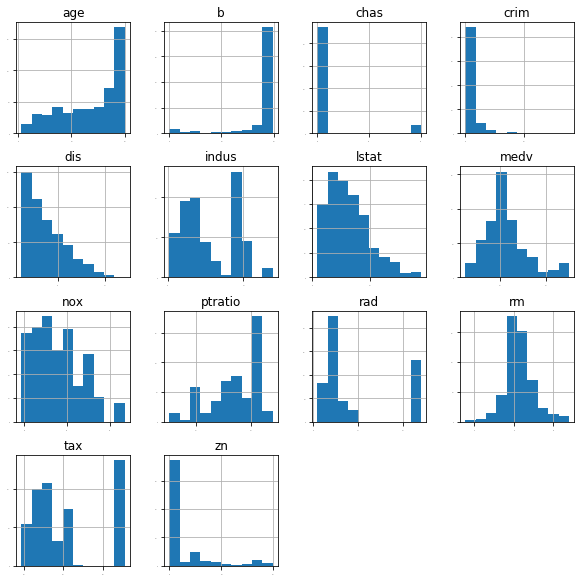

In [8]:
# Unimodal data visualizations
# Note
#  - age, black, crim, zn look like exponential distribution
#  - rad, tax look like bimodal distribution
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(10,10))
pyplot.show()

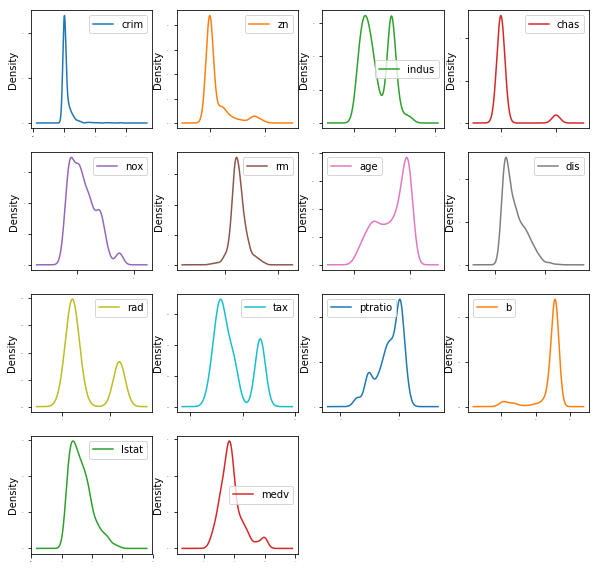

In [9]:
# Let us visualize as density plots
# Further confirms
#  - age, black, crim, zn look like exponential distribution
#  - rad, tax are bimodal

# Appears that
#  - nox, rm, lstat follow skewed Gaussian distribution
dataset.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, legend=True, fontsize=1, figsize=(10,10))
pyplot.show()

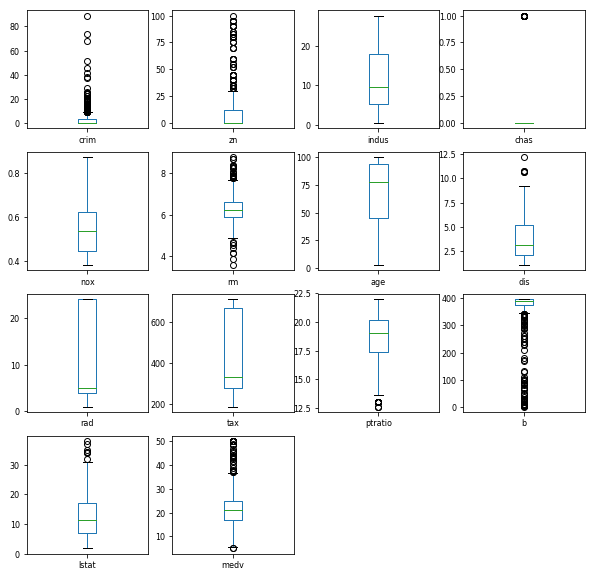

In [10]:
# Let us visualize as whisker plots

dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, figsize=(10, 10))
pyplot.show()

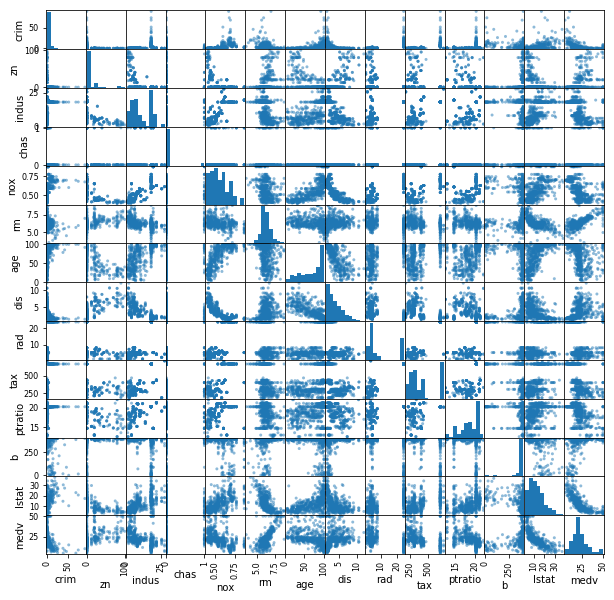

In [11]:
# Multimodal visualizations
scatter_matrix(dataset, figsize=(10,10))
pyplot.show()

In [12]:
names = dataset.columns
names

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

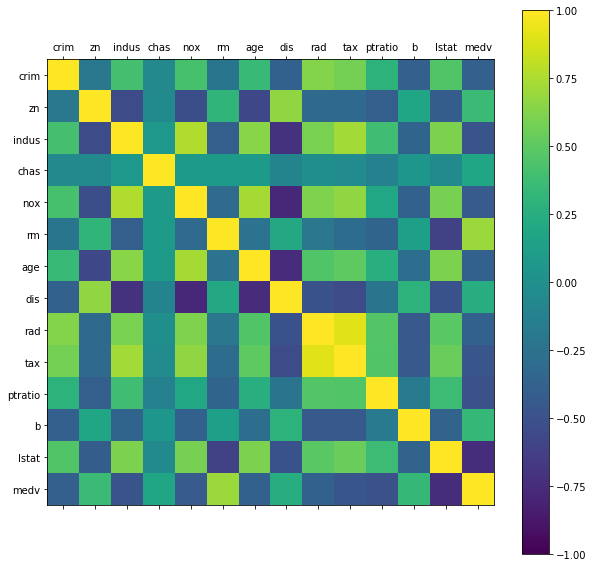

In [13]:
# View correlations between features
fig = pyplot.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

Summary of Data Analysis
We need to perform following tasks for better modelling:
 - Removal of most correlated features
 - Feature selection
 - Normalize features of varying scales in order to reduce negative effects
 - Standardize dataset to reduce effect of differing distributions

### Prepare Data and Evaluate Algorithms

We mix two steps viz., preparing data and evaluation of algorithms. We proceed as detailed below:<br/>
- Partition data set into Train and Validate sets
- Get Baseline metrics applying models on training data
- Check for improvement of metrics by applying models after data refinements

In [14]:
# Split dataset into train and validation sets
array = dataset.values
X = array[:, 0:13]
Y = array[:, 13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [33]:
# Evaluate algorithm on original data to get "Baseline" metrics
# Observations:
#  - LR shows lowest mean square error, folllowed by LASSO
#  - Tight distribution for KNN and wider distribution for SVR
#  - Differing scales probably hurting skill of model; more so for SVR and KNN

# Let us standardize data and check metrics in the next step

num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

# Linear Algorithms
#  - Linear Regression (LR)
#  - Lasso Regression (LASSO)
#  - ElasticNet (EN)

# Non-linear Algorithms
#  - Classification and Regression Trees(CART)
#  - Support Vector Regression (SVR)
#  - k-Nearest Neighbors (KNN)

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))

models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='auto')))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -21.111130 (8.461320)
SVR: -85.518342 (31.994798)


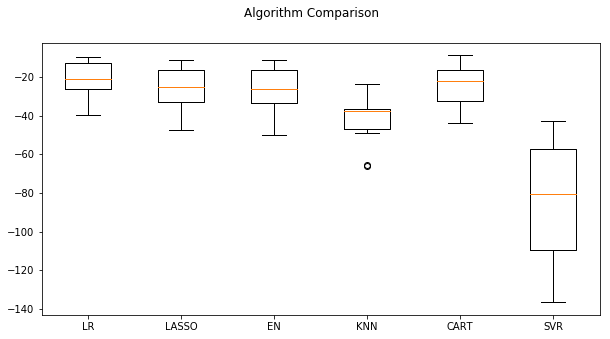

In [16]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10, 5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [17]:
# Evaluate algorithm after "standardizing data"
# i.e. transform data such that each attribute to have mean = 0 and std dev = 1
# to avoid data leakage, use pipelines

pipelines = []
pipelines.append(('ScaledLR',    Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledEN',    Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN',   Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART',  Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR',   Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -26.264084 (13.069271)
ScaledSVR: -29.633086 (17.009186)


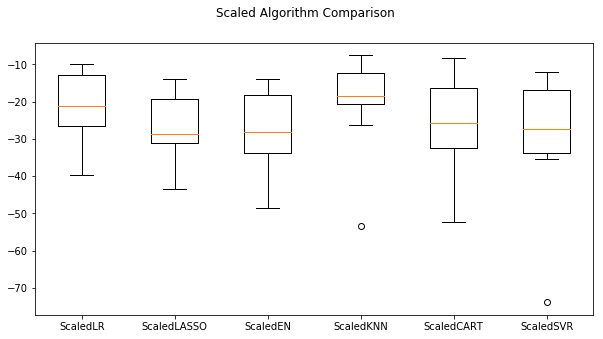

In [18]:
# Compare Scaled Algorithms
# Observation:
#  - Scaled KNN has tighter distribution and lowest MSE
#  - So, KNN may do better by altering by changing current setting of k-fold from 7 to other numbers. Let us try 1 to 21
#  
fig = pyplot.figure(figsize=(10,5))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [34]:
# Tune KNN algorithm
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21])
param_grid = dict(n_neighbors = k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(iid=True, estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [20]:
# Observation:
#  - Best fit on n_neibhbors = 3

print("Best: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.172137 using {'n_neighbors': 3}

-20.208663 (15.029652) with: {'n_neighbors': 1}
-18.172137 (12.950570) with: {'n_neighbors': 3}
-20.131163 (12.203697) with: {'n_neighbors': 5}
-20.575845 (12.345886) with: {'n_neighbors': 7}
-20.368264 (11.621738) with: {'n_neighbors': 9}
-21.009204 (11.610012) with: {'n_neighbors': 11}
-21.151809 (11.943318) with: {'n_neighbors': 13}
-21.557400 (11.536339) with: {'n_neighbors': 15}
-22.789938 (11.566861) with: {'n_neighbors': 17}
-23.871873 (11.340389) with: {'n_neighbors': 19}
-24.361362 (11.914786) with: {'n_neighbors': 21}


In [31]:
# Another way to improve performance of algorithms is by using ensemble methods
# We use 4 ensemble machine learning algorithms; 2 boosting and 2 bagging viz.,
#  Boosting
#    - AdaBoost
#    - Gradient Boosting

#  Bagging
#    - Random Forest
#    - Extra Trees

# Observations:
#  - RMS are calculated using default params [I've used n_estimators = 100 which is the default, to prevent warning message ]
#  - We notice improved scores than previous efforts in the steps above

# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=100))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=100))])))

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -15.311618 (6.653489)
ScaledGBM: -10.037370 (4.377606)
ScaledRF: -12.111571 (6.599379)
ScaledET: -9.277996 (5.614627)


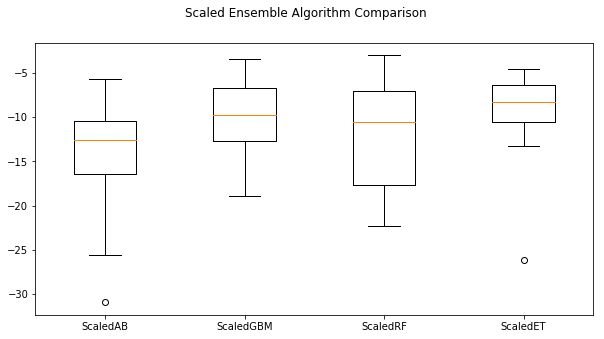

In [22]:
# Compare Algorithms
# Observations:
#  - It looks like Gradient Boosting has a better mean score, it also looks like Extra Trees has a similar distribution 
#    and perhaps a better median score.

fig = pyplot.figure(figsize=(10, 5))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [26]:
# Tune parameters of Ensemble method  for better performance

# The default number of boosting stages to perform (n estimators) is 100. 
# This is a good candidate parameter of Gradient Boosting to tune. 
# Often, the larger the number of boosting stages, the better the performance but the longer the training time.
# Let us try n_estimators from 50 to 400; each setting with k-fold = 10

# Observation:
#  Best configuration was n estimators=400 resulting in a mean squared error of -9.356471, 
#       about 0.65 units better than the untuned method
#  So, we finalize Gradient Boosting Method

# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(iid=True, estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.337334 using {'n_estimators': 400}

-10.794196 (4.711473) with: {'n_estimators': 50}
-10.023378 (4.430026) with: {'n_estimators': 100}
-9.677606 (4.264721) with: {'n_estimators': 150}
-9.523458 (4.258585) with: {'n_estimators': 200}
-9.433037 (4.250207) with: {'n_estimators': 250}
-9.411274 (4.259832) with: {'n_estimators': 300}
-9.350389 (4.239830) with: {'n_estimators': 350}
-9.337334 (4.253706) with: {'n_estimators': 400}


In [24]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.878916447820348
